In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn._config import set_config
set_config(print_changed_only=False)

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

df = pd.DataFrame(data=iris.data, columns=feature_names)
df['target'] = iris.target

df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [3]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)
df['gmm_cluster'] = gmm_cluster_labels

result = df.groupby(['target'])['gmm_cluster'].value_counts()
result

target  gmm_cluster
0       1              50
1       2              45
        0               5
2       0              50
Name: count, dtype: int64

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=42).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
df['kmeans_cluster'] = kmeans_cluster_labels

result = df.groupby(['target'])['kmeans_cluster'].value_counts()
result

target  kmeans_cluster
0       1                 50
1       2                 47
        0                  3
2       0                 36
        2                 14
Name: count, dtype: int64

---

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                        edgecolor='k', marker='$%d$' % label)

    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

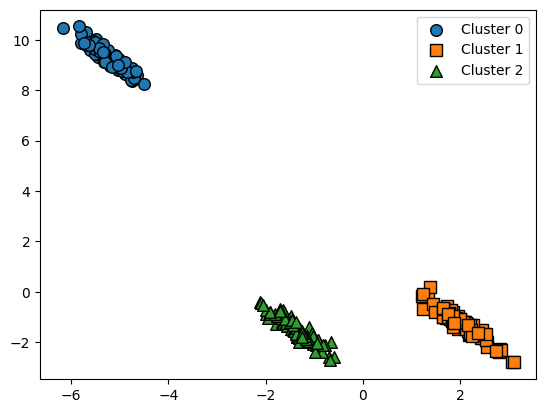

In [6]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=42)

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

df = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
df['target'] = y

visualize_cluster_plot(None, df, 'target', iscenter=False)

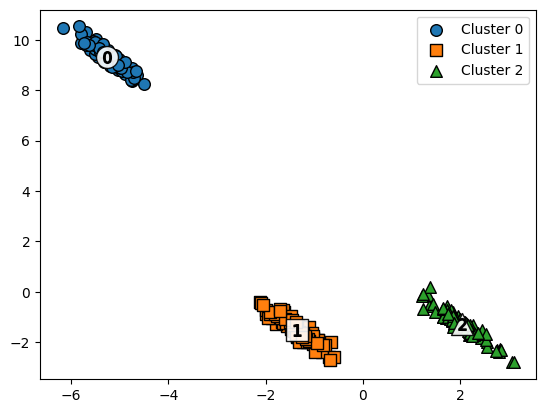

In [7]:
kmeans = KMeans(3, random_state=42)
kmeans_label = kmeans.fit_predict(X_aniso)
df['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, df, 'kmeans_label', iscenter=True)

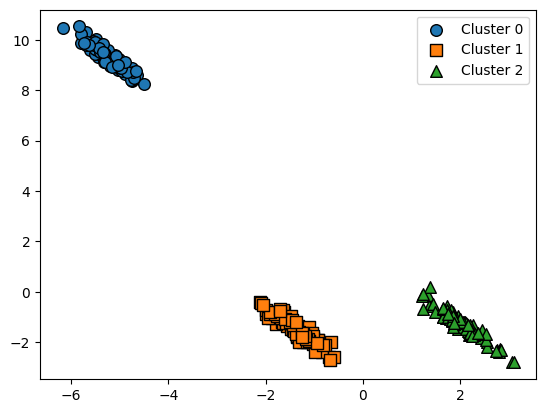

In [8]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
df['gmm_label'] = gmm_label

visualize_cluster_plot(gmm, df, 'gmm_label', iscenter=False)

In [9]:
print('### KMeans Clustering ###')
print(df.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(df.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       0               100
1       2               100
2       1               100
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       0            100
1       2            100
2       1            100
Name: count, dtype: int64
